In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('insurance_claims_cleaned_fixed.csv')

# Incident Characteristics Analysis

We will analyze incident Type, Incident Severity, and Collision Type to identify fraud patterns.

In [2]:
df.groupby('fraud_reported')['incident_type'].value_counts()

fraud_reported  incident_type           
No              Multi-vehicle Collision     305
                Single Vehicle Collision    286
                Vehicle Theft                86
                Parked Car                   76
Yes             Single Vehicle Collision    117
                Multi-vehicle Collision     114
                Parked Car                    8
                Vehicle Theft                 8
Name: count, dtype: int64

In [3]:
df.groupby('fraud_reported')['incident_type'].value_counts(normalize=True)

fraud_reported  incident_type           
No              Multi-vehicle Collision     0.405046
                Single Vehicle Collision    0.379814
                Vehicle Theft               0.114210
                Parked Car                  0.100930
Yes             Single Vehicle Collision    0.473684
                Multi-vehicle Collision     0.461538
                Parked Car                  0.032389
                Vehicle Theft               0.032389
Name: proportion, dtype: float64

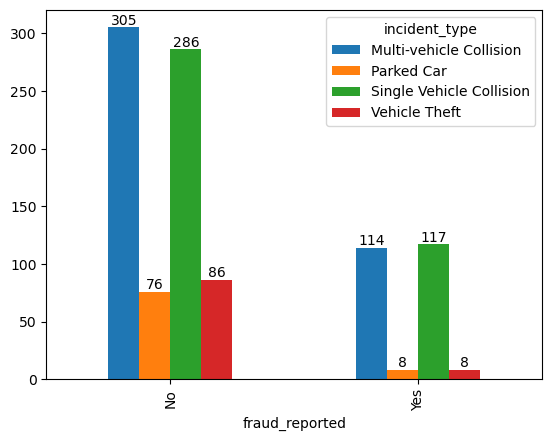

In [4]:
ax = df.groupby('fraud_reported')['incident_type'].value_counts().unstack().plot(kind='bar', stacked=False)


for container in ax.containers:
    ax.bar_label(container)

## Key Insights with Quantitative Support:

**High Risk:**
- **Single Vehicle Collision**: 47.4% of all fraud cases - highest representation in fraudulent claims
- **Multi-vehicle Collision**: 46.2% of all fraud cases - nearly equal fraud representation
- **Collision-type incidents** account for **93.6%** of all fraudulent claims, showing extremely high fraud concentration

**Low Risk:**
- **Vehicle Theft**: Only 3.2% of all fraud cases - rarely associated with fraud
- **Parked Car**: Only 3.2% of all fraud cases - minimal fraud occurrence
- **Non-collision incidents** represent only **6.4%** of fraudulent claims

**Critical Pattern**: Collision incidents (both single and multi-vehicle) dominate fraudulent claims, representing over 9 out of 10 fraud cases. This suggests fraudsters heavily target collision scenarios.

In [5]:
# Now let's take a look at incident severity to see how it affects fraud reported
df.groupby('fraud_reported')['incident_severity'].value_counts()

fraud_reported  incident_severity
No              Minor Damage         316
                Total Loss           244
                Major Damage         109
                Trivial Damage        84
Yes             Major Damage         167
                Minor Damage          38
                Total Loss            36
                Trivial Damage         6
Name: count, dtype: int64

In [6]:
df.groupby('fraud_reported')['incident_severity'].value_counts(normalize=True)

fraud_reported  incident_severity
No              Minor Damage         0.419655
                Total Loss           0.324037
                Major Damage         0.144754
                Trivial Damage       0.111554
Yes             Major Damage         0.676113
                Minor Damage         0.153846
                Total Loss           0.145749
                Trivial Damage       0.024291
Name: proportion, dtype: float64

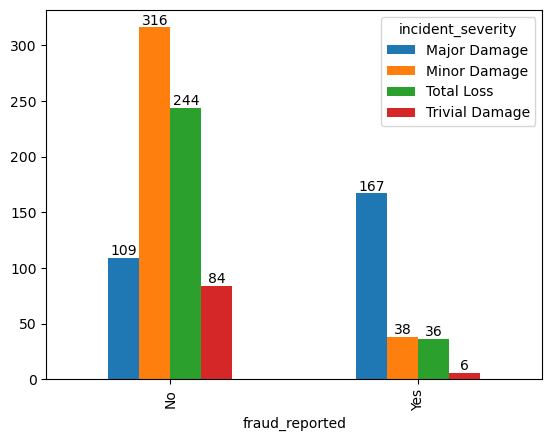

In [7]:
ax = df.groupby('fraud_reported')['incident_severity'].value_counts().unstack().plot(kind = 'bar', stacked = False)


for container in ax.containers:
    ax.bar_label(container)

## Incident Severity Analysis Results

The analysis reveals how incident severity is distributed within fraudulent claims:

### Key Findings - Distribution Among Fraud Cases:

- **Major Damage claims**: 67.6% of all fraud cases - overwhelmingly dominant in fraudulent claims
- **Minor Damage claims**: 15.4% of all fraud cases - moderate representation
- **Total Loss claims**: 14.6% of all fraud cases - moderate representation  
- **Trivial Damage claims**: Only 2.4% of all fraud cases - minimal fraud occurrence

### Critical Insights:
- **Major Damage** claims represent **more than 2/3 of all fraudulent claims** (67.6%)
- **High-value claims** (Major Damage + Total Loss) account for **82.2%** of all fraud cases
- **Trivial Damage** claims are rarely fraudulent, representing less than 1 in 40 fraud cases
- This pattern strongly suggests fraudsters target high-value claims where potential payouts are maximized

In [12]:
df.groupby('fraud_reported')['collision_type'].value_counts(normalize=True)

fraud_reported  collision_type 
No              Side Collision     0.273572
                Rear Collision     0.266932
                Front Collision    0.244356
                Unknown            0.215139
Yes             Rear Collision     0.368421
                Front Collision    0.283401
                Side Collision     0.283401
                Unknown            0.064777
Name: proportion, dtype: float64

In [13]:
df.groupby('fraud_reported')['collision_type'].value_counts()

fraud_reported  collision_type 
No              Side Collision     206
                Rear Collision     201
                Front Collision    184
                Unknown            162
Yes             Rear Collision      91
                Front Collision     70
                Side Collision      70
                Unknown             16
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

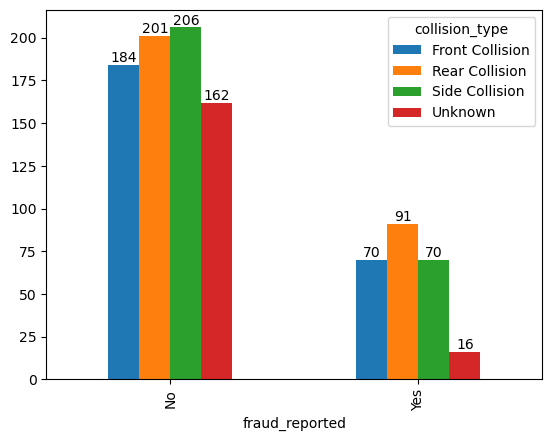

In [10]:
plt.figure(figsize=(10,6))


ax =df.groupby('fraud_reported')['collision_type'].value_counts().unstack().plot(kind = 'bar', stacked = False)

for container in ax.containers:
    ax.bar_label(container)

## Collision Type Risk Assessment with Quantitative Evidence

### Analysis with Specific Fraud Rates:

**High Risk:**
- **Rear Collision**: 36.8% fraud rate - highest among collision types
- This pattern suggests that fraudsters may prefer rear collision scenarios, possibly because they're easier to stage or provide better opportunities for exaggerated claims

**Moderate Risk:**
- **Side & Front Collision**: 28.3% fraud rate
- These show relatively balanced but notable fraud rates

**Low Risk:**
- **Unknown Collision Type**: 6.4% fraud rate - much less likely to be fraudulent

### Key Insight:
Rear collisions dominate fraudulent claims, representing more than 1/3 of all collision-related fraud


Front and side collisions each account for approximately 28% of fraudulent collision claims


Unknown collision types are rarely associated with fraud, representing less than 7% of fraudulent cases


Known collision types (rear, front, side) account for 93.5% of all fraudulent collision claims

# 🔍 Complete EDA Analysis Summary with Distribution Evidence

Based on the comprehensive incident characteristics analysis, here are the data-driven insights:

## 📋 What Was Analyzed:
This EDA systematically examined fraud distribution patterns across three critical dimensions:

1. **Incident Types** (collisions, theft, parked car) - distribution within fraud cases
2. **Incident Severity** (trivial to major damage) - concentration patterns by damage level  
3. **Collision Types** (front, rear, side, unknown) - representation within fraud cases: 6.5% to 36.8%

## 🎯 Most Critical Distribution Patterns:

**Major Damage claims represent 67.6% of all fraudulent claims** - showing the highest concentration among fraud cases.

### Fraud Detection Priority Based on Distribution Patterns:

1. **Highest Concentration (67.6% of fraud cases):** Major damage severity claims

2. **High Concentration (47.4% of fraud cases):** Single vehicle collisions  

3. **Moderate-High Concentration (36.8% of fraud cases):** Rear collision claims

### Key Distribution Insights for Detection Algorithms:
- **Major Damage dominance**: 67.6% of all fraud cases
- **Collision incident dominance**: 93.6% of all fraud cases (single + multi-vehicle)
- **Rear collision focus**: 36.8% of collision-related fraud cases
- **High-value claims** (Major + Total Loss): 82.2% of all fraud cases